In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1,inplace=True)

In [5]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


isFraud
0    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

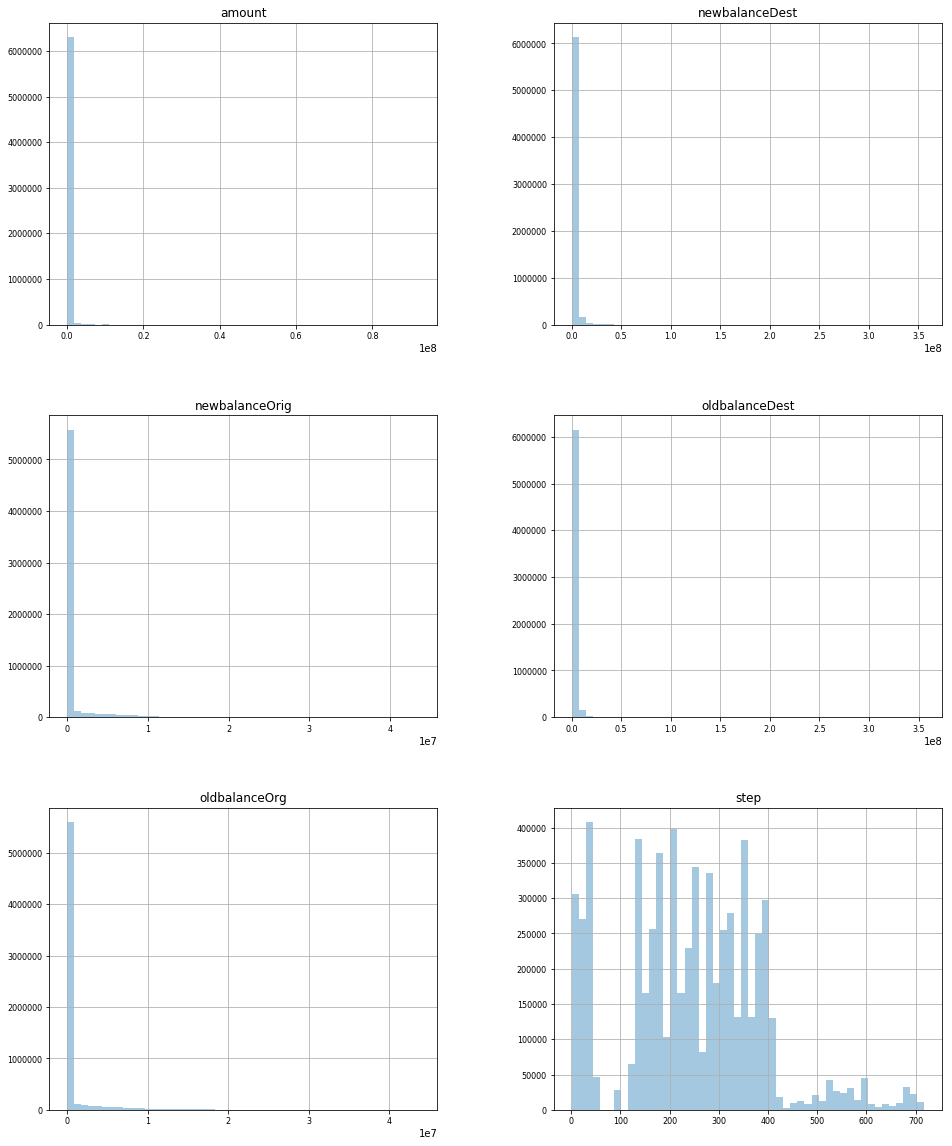

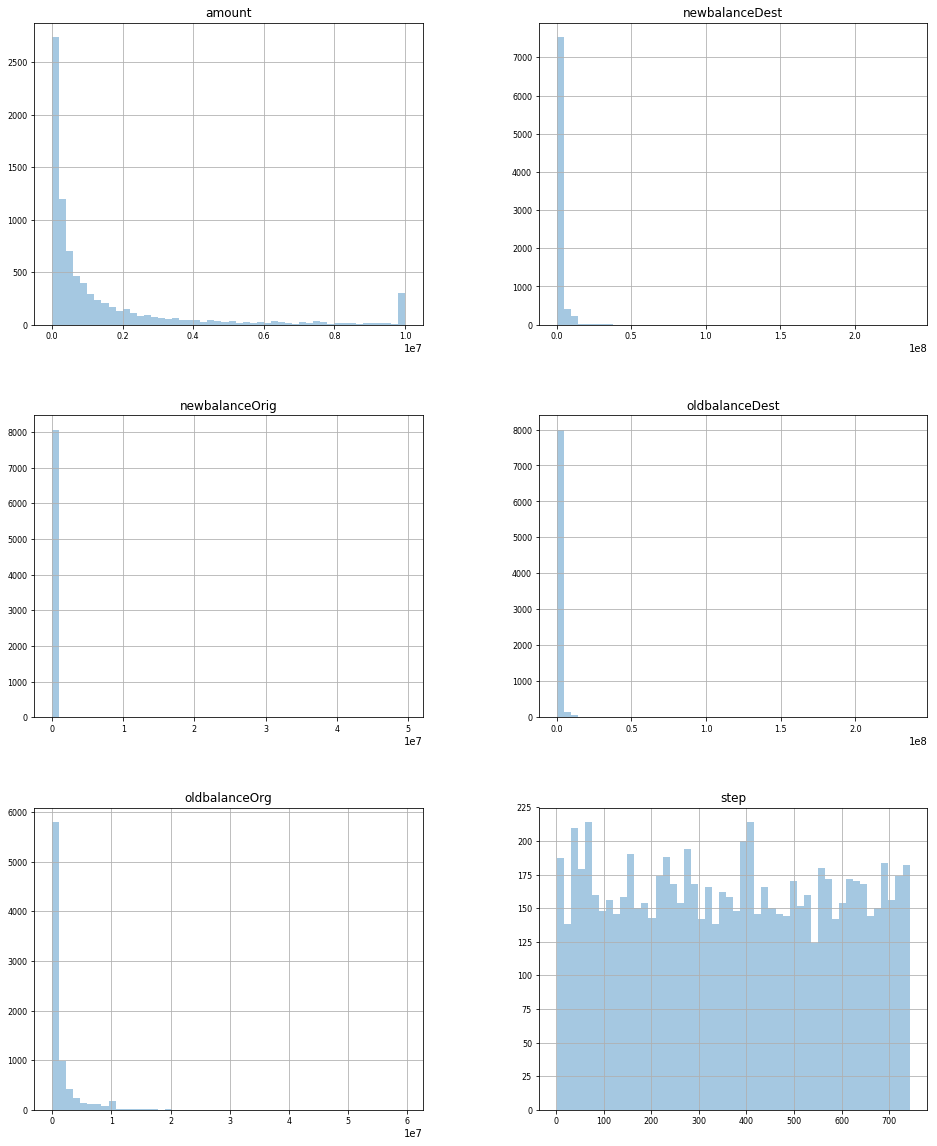

In [6]:
df.groupby('isFraud').hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8,alpha=0.4)

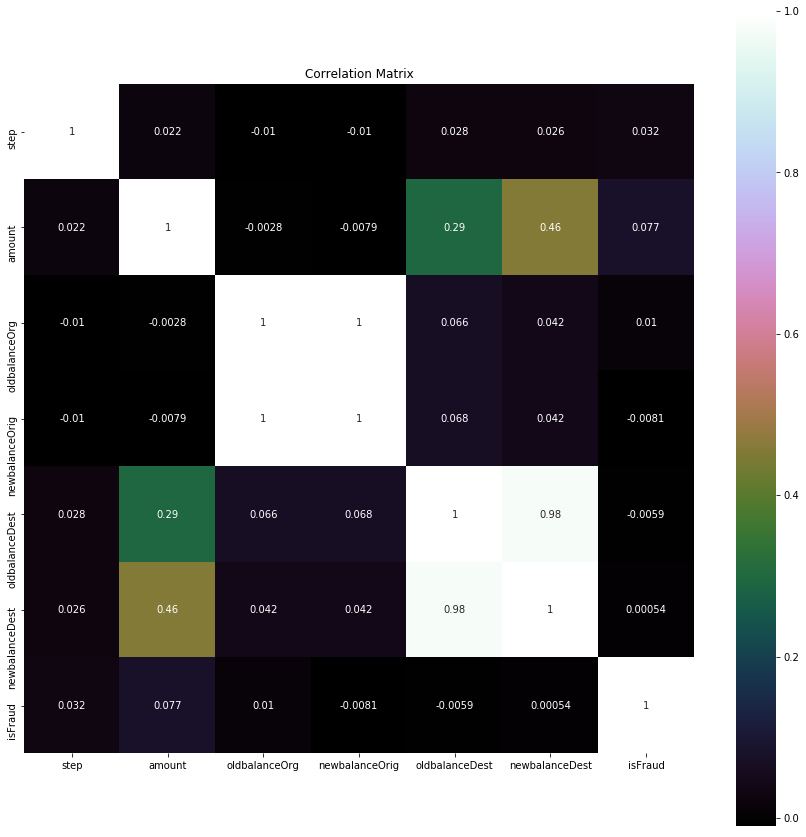

In [7]:
correlation = df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [8]:
dum = pd.get_dummies(df['type'])
df1 = pd.concat([df,dum],axis=1)
df1.drop(['type'],axis=1, inplace=True)

0    19973
1       27
Name: isFraud, dtype: int64
Before OverSampling, counts of label '1': 19
Before OverSampling, counts of label '0': 13981 

After OverSampling, the shape of train_X: (27962, 11)
After OverSampling, the shape of train_y: (27962,) 

After OverSampling, counts of label '1': 13981
After OverSampling, counts of label '0': 13981


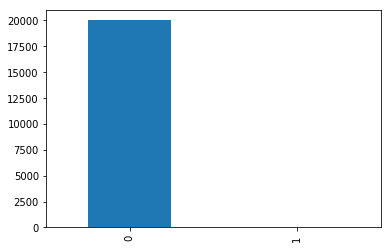

In [15]:


df2 = df1.sample(n=20000)
df2.isFraud.value_counts().plot.bar()
print(df2.isFraud.value_counts())



X_train, X_test, y_train, y_test = train_test_split(df2.drop(['isFraud'],axis=1), df2['isFraud'], test_size=0.3, random_state=0)

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))


sm = SMOTE(random_state=10, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train_res)
x_test_scaled = sc.transform(X_test)

In [19]:

model = Sequential()


model.add(Dense(input_dim=11, output_dim = 6, init = 'uniform', activation = 'relu'))


model.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))


model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))


model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_info = model.fit(x_train_scaled, y_train_res, batch_size = 10, nb_epoch = 10)

   

Epoch 1/10
27962/27962 [==============================] - 13s 463us/step - loss: 0.2602 - acc: 0.9126
Epoch 2/10
27962/27962 [==============================] - 13s 448us/step - loss: 0.1480 - acc: 0.9514
Epoch 3/10
27962/27962 [==============================] - 12s 443us/step - loss: 0.0924 - acc: 0.9689
Epoch 4/10
27962/27962 [==============================] - 13s 466us/step - loss: 0.0703 - acc: 0.9739
Epoch 5/10
27962/27962 [==============================] - 13s 451us/step - loss: 0.0593 - acc: 0.9768
Epoch 6/10
27962/27962 [==============================] - 12s 447us/step - loss: 0.0524 - acc: 0.9790
Epoch 7/10
27962/27962 [==============================] - 13s 453us/step - loss: 0.0476 - acc: 0.9808
Epoch 8/10
27962/27962 [==============================] - 13s 455us/step - loss: 0.0441 - acc: 0.9823
Epoch 9/10
27962/27962 [==============================] - 13s 456us/step - loss: 0.0415 - acc: 0.9829
Epoch 10/10
27962/27962 [==============================] - 13s 452us/step - loss: 